The CelebA (CelebFaces Attributes) Dataset is a large-scale face dataset widely used in computer vision and machine learning research, particularly in tasks related to facial recognition, attribute prediction, and generative modeling. Here’s a detailed description:

### Overview
- **Name:** CelebA (CelebFaces Attributes) Dataset
- **Publisher:** The Chinese University of Hong Kong (CUHK)
- **Release Year:** 2015

### Composition
- **Images:** Over 200,000 celebrity images
- **Individuals:** 10,177 unique identities
- **Attributes:** Each image is annotated with 40 binary attributes, providing rich detail on facial characteristics such as age, gender, facial hair, accessories (like eyeglasses and hats), and more.
- **Landmarks:** Each image comes with five landmark locations, including the positions of eyes, nose, and mouth.

### Key Features
1. **Diversity:** The dataset includes a wide variety of poses, lighting conditions, and backgrounds, capturing real-world variability.
2. **Annotations:** Detailed annotations for each image make it suitable for supervised learning tasks. The 40 attributes cover a broad spectrum of facial features and accessories, enabling multi-label classification.
3. **Landmarks:** The inclusion of landmark points facilitates tasks such as facial alignment and keypoint detection.
4. **Data Split:** The dataset is split into training, validation, and test sets, ensuring a standardized evaluation process for different algorithms.

### Applications
- **Facial Attribute Prediction:** Training models to predict the presence or absence of specific facial attributes.
- **Face Recognition:** Benchmarking face recognition systems.
- **Generative Models:** Developing and evaluating generative adversarial networks (GANs) and other generative models to create realistic facial images.
- **Facial Landmark Detection:** Enhancing the accuracy of detecting facial keypoints.
- **Style Transfer and Editing:** Applying facial attributes to edit images or transfer styles between images.

### Accessibility
The CelebA dataset is publicly available for academic research and can be accessed from the official website of the Chinese University of Hong Kong or other repositories hosting the dataset.

### Impact
Since its release, the CelebA dataset has become a benchmark in the field of computer vision, extensively cited in research papers and used in various competitions and challenges. Its comprehensive annotations and large scale have made it invaluable for advancing the state of the art in facial analysis technologies.

In [1]:
!mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

--2024-06-27 08:45:08--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.64, 52.219.194.168, 52.219.216.56, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  27.8MB/s    in 51s     

2024-06-27 08:46:00 (27.0 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



In [2]:
!unzip celeba.zip -d data_faces
!rm -r celeba.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 extracting: data_faces/img_align_celeba/197600.jpg  
 extracting: data_faces/img_align_celeba/197601.jpg  
 extracting: data_faces/img_align_celeba/197602.jpg  
 extracting: data_faces/img_align_celeba/197603.jpg  
 extracting: data_faces/img_align_celeba/197604.jpg  
 extracting: data_faces/img_align_celeba/197605.jpg  
 extracting: data_faces/img_align_celeba/197606.jpg  
 extracting: data_faces/img_align_celeba/197607.jpg  
 extracting: data_faces/img_align_celeba/197608.jpg  
 extracting: data_faces/img_align_celeba/197609.jpg  
 extracting: data_faces/img_align_celeba/197610.jpg  
 extracting: data_faces/img_align_celeba/197611.jpg  
 extracting: data_faces/img_align_celeba/197612.jpg  
 extracting: data_faces/img_align_celeba/197613.jpg  
 extracting: data_faces/img_align_celeba/197614.jpg  
 extracting: data_faces/img_align_celeba/197615.jpg  
 extracting: data_faces/img_align_celeba/197616.jpg  
 ext

In [11]:
!gdown --id 1s1ILu5QLJbV-rBGVkWxIzKz6G1ExjnJV
!unzip list_attr_celeba.csv.zip -d data_faces
!rm -r list_attr_celeba.csv.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1s1ILu5QLJbV-rBGVkWxIzKz6G1ExjnJV
To: /content/list_attr_celeba.csv.zip
100% 2.12M/2.12M [00:00<00:00, 192MB/s]
Archive:  list_attr_celeba.csv.zip
  inflating: data_faces/list_attr_celeba.csv  


In [4]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms
import torch.optim as  optim
from torchvision import datasets
from torch.utils.data import DataLoader

from torch.autograd import Variable

In [5]:
from torch.utils.data import Dataset

In [6]:
import pandas as pd

In [7]:
def show(img,renorm=False,nrow=8,interpolation='bicubic'):
  if renorm:
    img = img/2 + 0.5
  img_grid = torchvision.utils.make_grid(img,nrow=nrow).numpy()
  plt.figure()
  plt.imshow(np.transpose(img_grid, (1,2,0)), interpolation=interpolation)
  plt.axis('off')
  plt.show()

In [12]:
#list_attr_celeba.csv: Attribute labels for each image.
#There are 40 attributes. "1" represents positive while "-1" represents negative
df = pd.read_csv("data_faces/list_attr_celeba.csv")

In [ ]:
df.head()

In [13]:
# Transformations of the input images:  Resizing and intensity normalization
transform = transforms.Compose(
    [transforms.Resize(size=(128,128), interpolation=Image.BICUBIC),
     transforms.ToTensor()])

In [14]:
data, labels=df.values[:,0],(df.values[:,1:]+1)//2
classes=df.columns[1:]

In [24]:
# We will only keep some attributes to train the network.
classes[[39,20,22,2,31,15]]

Index(['Young', 'Male', 'Mustache', 'Attractive', 'Smiling', 'Eyeglasses'], dtype='object')

In [15]:
class CelebADataset(Dataset):
    def __init__(self, data, labels,classes, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform
        self.classes = classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = Image.open(os.path.join('data_faces','img_align_celeba',self.data[idx])).convert('RGB')
        #Binary value that indicates whether the attribute is present in the image.
        label = torch.Tensor(self.labels[idx,[39,20,22,2,31,15]].astype('uint8'))
        if self.transform:
            img = self.transform(img)
        sample = {'images': img, 'labels': label}
        return sample

In [16]:
#Creating a DataLoader for the CelebA dataset in PyTorch
celeba_data = CelebADataset(data, labels,classes,transform)
celeba_loader = DataLoader(celeba_data,batch_size=64,shuffle=True)

In [17]:
celeba_data[0]

{'images': tensor([[[0.9922, 0.9922, 0.9922,  ..., 1.0000, 0.9804, 1.0000],
          [0.9922, 0.9922, 0.9922,  ..., 1.0000, 0.9882, 1.0000],
          [0.9922, 0.9922, 0.9922,  ..., 0.9804, 0.9922, 0.9961],
          ...,
          [0.7059, 0.6510, 0.5373,  ..., 0.3961, 0.3804, 0.3725],
          [0.5294, 0.5098, 0.5961,  ..., 0.4667, 0.4667, 0.4588],
          [0.6118, 0.7725, 0.8824,  ..., 0.4627, 0.4667, 0.4706]],
 
         [[0.9059, 0.9059, 0.9059,  ..., 0.9294, 0.9098, 0.9333],
          [0.9059, 0.9059, 0.9059,  ..., 0.9373, 0.9176, 0.9373],
          [0.9059, 0.9059, 0.9059,  ..., 0.9176, 0.9294, 0.9333],
          ...,
          [0.4471, 0.3882, 0.2706,  ..., 0.1451, 0.1294, 0.1255],
          [0.2667, 0.2431, 0.3255,  ..., 0.2000, 0.2039, 0.2000],
          [0.3451, 0.5059, 0.6118,  ..., 0.1922, 0.1922, 0.2000]],
 
         [[0.7608, 0.7608, 0.7608,  ..., 0.8510, 0.8627, 0.8745],
          [0.7608, 0.7608, 0.7608,  ..., 0.8588, 0.8706, 0.8784],
          [0.7608, 0.7608, 0.7

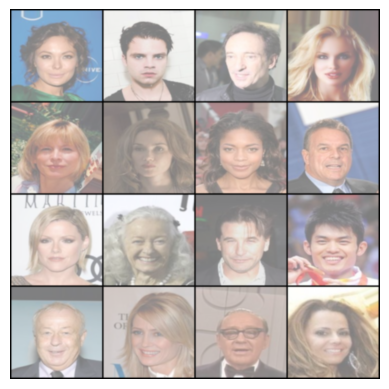

In [18]:
#Visualize some training samples
batch= next(iter(celeba_loader))
show(batch['images'][0:16], renorm = True, nrow=4)

In [19]:
class VAE(nn.Module):
    def __init__(self, image_size=128, latent_dim=512):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )
        self.Embeddings = nn.Embedding(2,10)
        # Define the parameters for mean and variance
        self.fc_mu = nn.Linear(256 * (image_size // 16) * (image_size // 16), latent_dim)
        self.fc_logvar = nn.Linear(256 * (image_size // 16) * (image_size // 16), latent_dim)

        # Decoder
        self.decoder_input = nn.Linear(latent_dim+6*10, 256 * (image_size // 16) * (image_size // 16))
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )
        self.image_size=image_size

    def encode(self, x):
        x = self.encoder(x)
        mu, logvar = self.fc_mu(x), self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        x = self.decoder_input(z)
        x = x.view(-1, 256, (self.image_size // 16), (self.image_size // 16))
        x = self.decoder(x)
        return x

    def forward(self, x,labels):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        B,_=z.shape
        z_labels=self.Embeddings(labels).reshape(B,-1)
        z=torch.cat([z,z_labels],1)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [20]:
# Custom loss function for VAE
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.BCELoss(reduction='sum')(recon_x, x)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
# Initialize VAE model
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
# Train the VAE
num_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

best_loss=np.inf
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    cpt=0
    for batch_idx, data in enumerate(celeba_loader):
        imgs, labels= data['images'].float().to(device),data['labels'].long().to(device)

        recon_img, mu, logvar = model(imgs,labels)
        loss = vae_loss(recon_img, imgs, mu, logvar)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        cpt+=1

        if batch_idx % 1000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, batch_idx+1, len(celeba_loader), total_loss/cpt))
    print('Epoch [{}/{}], Total Loss: {:.4f}'.format(epoch+1, num_epochs, total_loss / len(celeba_loader)))
    if total_loss<best_loss:
        best_loss=total_loss
        torch.save(model.state_dict(), 'celeba_vae.pth')




Epoch [1/50], Step [1/3166], Loss: 2178126.5000
Epoch [1/50], Step [1001/3166], Loss: 1670381.1521


KeyboardInterrupt: 